<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/IntroClustering2_highDimensions_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1eaZWfBLfmkzNndnA8pJvo6tO4Lm7Qz83' width=500>

# <font color='lightblue'>Data dimensions</font>

In this exercise we will look at adding an extra dimension to our points. We'll look at how changing the problem from 2D to 3D can cause challenges. 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import cluster
import sklearn as sk


## <font color='lightblue'>Simulating data</font>

Let's simulate some data where we know how many clusters there are. This time we'll add an extra dimension. 

> i.e., let's create 1000 points and set them to class 1. Each point will get a random x, y, and z coordinate.

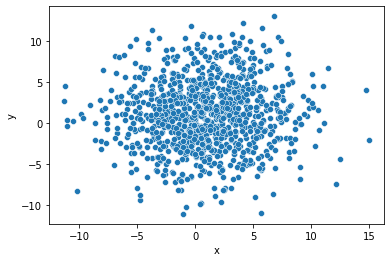

In [3]:
#simulate some random values
array_class1 = {"x":np.random.normal(1,4, size=1000),
                "y":np.random.normal(1,4, size=1000),
                "z":np.random.normal(1,40, size=1000),
                "class": 1}

#put them in a dataframe
df_class1 = pd.DataFrame(data=array_class1)

#plot it
sns.scatterplot(data=df_class1, x="x",y="y")


Because the cluster is more than 2 dimensions it is hard to visualize with a scatterplot. Let's look at the cluster from the x and z dimension.

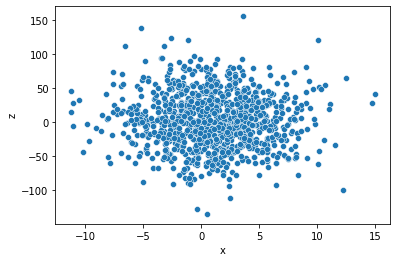

In [4]:
sns.scatterplot(data=df_class1, x="x",y="z")

Create another set of 1000 points and assign them to class 2. Then we'll add the two sets of points together by using **concat**:


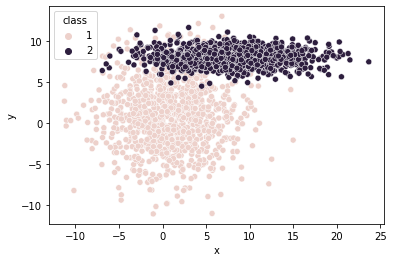

In [5]:
#generate some random values
array_class2 = {"x":np.random.normal(8,5, size=1000),
                "y":np.random.normal(8,1, size=1000),
                "z":np.random.normal(8,0.5, size=1000),
                "class": 2}

#put them in a dataframe
df_class2 = pd.DataFrame(data=array_class2)

#bind the two dataframes together by rows
df_class = pd.concat([df_class1,df_class2], axis = 0) #axis=0 just says to bind by rows, axis=1 would be by columns 

#plot it
sns.scatterplot(data=df_class, x="x",y="y", hue='class')

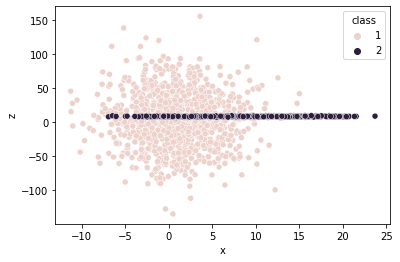

In [6]:
sns.scatterplot(data=df_class, x="x",y="z", hue='class')


## <font color='lightblue'>Visualizing in 3D</font>

Let's learn how to visualize data in 3D! We'll use **plotly** as it is easy to use and gives us a great interactive plot to use!

In [7]:
#import plotly
import plotly.express as px

#build a figure with three axis
fig = px.scatter_3d(df_class, x='x', y='y', z='z', color='class')
fig.show()

## <font color='lightblue'>Clustering with many dimensions</font>

Let's try out the clustering in higher dimensions using k-means.
> The approach we use will work the same for HDBScan and many of the other clustering algorithm.

**First** let's build the machine learning algorithm that we will use (i.e., k-means)

In [8]:
#initalize the kmeans algorithm
clus_kmeans = cluster.KMeans(n_clusters=2) #how many clusters are there?

**Second** let's fit the model using data 
> This is the only difference: we need to make sure we pass all the dimensions when fitting the algorithm

In [9]:
#fit the model
clus_kmeans.fit(df_class[['x','y','z']] )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Third**, now that the model is built and fit to data we can use it to make predictions!

In [10]:
#make some predictions
df_class['pred_kmeans'] = clus_kmeans.fit_predict(df_class[['x','y','z']] )

#take a look
df_class

,x,y,z,class,pred_kmeans
0,-4.046819,9.074797,-17.786250,1,1
1,2.658377,-3.013268,-20.318334,1,1
2,4.899762,3.755256,-4.829884,1,0
3,-4.529103,2.646666,2.863825,1,0
4,2.114439,-2.384819,-20.667517,1,1
...,...,...,...,...,...
995,13.310344,8.221071,7.744592,2,0
996,12.981969,9.812455,8.409460,2,0
997,9.888505,7.558005,7.782709,2,0
998,19.603655,8.263208,8.069943,2,0


Similarly, when measuring the performance of the algorithm we need to include all dimension when making predictions.

In [11]:
sk.metrics.silhouette_score(X=df_class.loc[:,['x','y','z']],labels=df_class['pred_kmeans'])

0.6123771271734622

Finally, let's plot those predictions in 3D

In [12]:
#build a figure with three axis
fig_pred = px.scatter_3d(df_class, x='x', y='y', z='z', color='pred_kmeans')
fig_pred.show()

## <font color='lightblue'>Bonus</font>

Try to again cluster the above dataset, this time using the HDBScan algorithm.

In [13]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 6.4MB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311670 sha256=ce601e521dd11dcc5dbdf06bdf7818489002501adf982d75e8a5caa7884bf02a
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [20]:
#initalize the kmeans algorithm (hyperparameter - choose minimum cluster size)
clus_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 30) 

Second fit the ml algorithm to the data


In [21]:
#fit the model
clus_hdbscan.fit(df_class[['x','y','z']] )

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=30, min_samples=None, p=None,
        prediction_data=False)

Third use the ml algorithm to make some predictions

In [22]:
#make some predictions
df_class['pred_khdbscan'] = clus_hdbscan.fit_predict(df_class[['x','y','z']] )

In [23]:
#build a figure with three axis
fig_Hpred = px.scatter_3d(df_class, x='x', y='y', z='z', color='pred_khdbscan')
fig_Hpred.show()

How well does the HDBScan algorithm do? How does it differ from KMeans?

## <font color='lightblue'>Further reading</font>

[Plotly tutorials](https://plotly.com/python/plotly-fundamentals/)